In [1]:
# Importing all the necessary packages, modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as san
import tensorflow as tf
import os
import sys
import sklearn
import skimage
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import binary_accuracy


In [2]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\Acer\Dataset_1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Acer\Dataset_1\app.py
C:\Users\Acer\Dataset_1\final.pptx
C:\Users\Acer\Dataset_1\final_ML_ppt.pptx
C:\Users\Acer\Dataset_1\final_one.pptx
C:\Users\Acer\Dataset_1\final_work_final_correct-Copy1.ipynb
C:\Users\Acer\Dataset_1\final_work_final_correct.ipynb
C:\Users\Acer\Dataset_1\final_work_final_correct1.py
C:\Users\Acer\Dataset_1\images_of_project.docx
C:\Users\Acer\Dataset_1\Major_project_without_code.docx
C:\Users\Acer\Dataset_1\Major_project_word.docx
C:\Users\Acer\Dataset_1\Major_project_word.pdf
C:\Users\Acer\Dataset_1\model.h5
C:\Users\Acer\Dataset_1\model.pkl
C:\Users\Acer\Dataset_1\my_model.h5
C:\Users\Acer\Dataset_1\my_model.hdf5
C:\Users\Acer\Dataset_1\Normal.rar
C:\Users\Acer\Dataset_1\reference.txt
C:\Users\Acer\Dataset_1\synopsis.pdf
C:\Users\Acer\Dataset_1\Tuberculosis.rar
C:\Users\Acer\Dataset_1\Untitled1-Copy1.ipynb
C:\Users\Acer\Dataset_1\Untitled1.ipynb
C:\Users\Acer\Dataset_1\~$jor_project_word.docx
C:\Users\Acer\Dataset_1\.ipynb_checkpoints\final_work_final_

C:\Users\Acer\Dataset_1\Normal\Normal3261000.png
C:\Users\Acer\Dataset_1\Normal\Normal3262000.png
C:\Users\Acer\Dataset_1\Normal\Normal3263000.png
C:\Users\Acer\Dataset_1\Normal\Normal3264000.png
C:\Users\Acer\Dataset_1\Normal\Normal3265000.png
C:\Users\Acer\Dataset_1\Normal\Normal3266000.png
C:\Users\Acer\Dataset_1\Normal\Normal3267000.png
C:\Users\Acer\Dataset_1\Normal\Normal3268000.png
C:\Users\Acer\Dataset_1\Normal\Normal3269000.png
C:\Users\Acer\Dataset_1\Normal\Normal327000.png
C:\Users\Acer\Dataset_1\Normal\Normal3270000.png
C:\Users\Acer\Dataset_1\Normal\Normal3271000.png
C:\Users\Acer\Dataset_1\Normal\Normal3272000.png
C:\Users\Acer\Dataset_1\Normal\Normal3273000.png
C:\Users\Acer\Dataset_1\Normal\Normal3274000.png
C:\Users\Acer\Dataset_1\Normal\Normal3275000.png
C:\Users\Acer\Dataset_1\Normal\Normal3276000.png
C:\Users\Acer\Dataset_1\Normal\Normal3277000.png
C:\Users\Acer\Dataset_1\Normal\Normal3278000.png
C:\Users\Acer\Dataset_1\Normal\Normal3279000.png
C:\Users\Acer\Dataset

C:\Users\Acer\Dataset_1\Tuberculosis\2050011.png
C:\Users\Acer\Dataset_1\Tuberculosis\205011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2051011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2052011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2053011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2054011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2055011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2056011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2057011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2058011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2059011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2060011.png
C:\Users\Acer\Dataset_1\Tuberculosis\206011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2061011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2062011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2063011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2064011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2065011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2066011.png
C:\Users\Acer\Dataset_1\Tuberculosis\2067011.png
C:\Users\Acer\Dataset_

In [3]:

## During importing find that cv2 is not install so installing it through below command

#pip install opencv-python

In [4]:


# Accessing the folder where necessary other folders as available

os.listdir(r"C:\Users\Acer\Dataset_1")

## checking the length of the necessary folders so we can know that we are at correct folder and we are at right direction

print(len(os.listdir(r"C:\Users\Acer\Dataset_1\Normal")))

print(len(os.listdir(r"C:\Users\Acer\Dataset_1\Tuberculosis")))

print(len(os.listdir()))
print(os.listdir)


3500
3500
25
<built-in function listdir>


In [5]:

## now we are going to create the dataframe from the available files to work on it

normal = os.listdir(r"C:\Users\Acer\Dataset_1\Normal")
print(len(normal))
tuberculosis = os.listdir(r"C:\Users\Acer\Dataset_1\Tuberculosis")
print(len(tuberculosis))

3500
3500


## Converting images into dataframes and removing thumbs files if any available or created during creating dataframes

## What is Thumbs files?
### In Windows, thumbs.db files are database files containing the small images displayed when you view a folder in Thumbnail view (as opposed to Tile, Icon, List, or Detail view). These files are automatically generated by Windows, and there is no harm in deleting them or excluding them from system backups.

In [6]:
# put the images into dataframes
df_normal = pd.DataFrame(normal, columns=['image_id'])
df_tuberculosis = pd.DataFrame(tuberculosis, columns=['image_id'])

# remove the 'Thunbs.db' line
df_normal = df_normal[df_normal['image_id'] != 'Thumbs.db']
df_tuberculosis = df_tuberculosis[df_tuberculosis['image_id'] != 'Thumbs.db']

# Reset the index or this will cause an error later
df_normal.reset_index(inplace=True, drop=True)
df_tuberculosis.reset_index(inplace=True, drop=True)

print(df_normal.shape)
print(df_tuberculosis.shape)


(3500, 1)
(3500, 1)


# Exploratory Data Analysis

In [7]:

print(df_normal.head())

            image_id
0     Normal0000.png
1     Normal1000.png
2    Normal10000.png
3   Normal100000.png
4  Normal1000000.png


In [8]:
print(df_tuberculosis.head())

      image_id
0     0011.png
1  1000011.png
2   100011.png
3  1001011.png
4    10011.png


In [9]:
print(df_normal.columns)

Index(['image_id'], dtype='object')


In [10]:
print(df_tuberculosis.head())

      image_id
0     0011.png
1  1000011.png
2   100011.png
3  1001011.png
4    10011.png


In [11]:
print(df_normal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  3500 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB
None


In [12]:
print(df_tuberculosis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  3500 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB
None


In [13]:
print(df_normal.describe())

                 image_id
count                3500
unique               3500
top     Normal1111000.png
freq                    1


In [14]:
print(df_tuberculosis.describe())

          image_id
count         3500
unique        3500
top     243011.png
freq             1


# properly working but use only one time next time input should be changed then it will work
## should change the name of the images 

<ol>
<li>import os<li>
<li>path = r"D:\crome download\Dataset\Normal" <li>
<li>files = os.listdir(path)<li>
<li>os.getcwd()<li>
<li>for index, file in enumerate(files):<li>
    <li>os.rename(os.path.join(path, file), os.path.join(path, str(index)+'000'+'.png'))<li>
        <ol>

In [15]:
print(df_normal.head())
#print(df_normal.describe())

            image_id
0     Normal0000.png
1     Normal1000.png
2    Normal10000.png
3   Normal100000.png
4  Normal1000000.png


### work only one time because the images are renamed only once
<ol>
<li>import os<li>
<li>path1 = r"D:\crome download\Dataset\Tuberculosis"<li>
<li>files = os.listdir(path1)<li>
<li>os.getcwd()<li>
<li>for index, file in enumerate(files):<li>
    <li>os.rename(os.path.join(path1, file), os.path.join(path1, str(index)+'011'+'.png'))<li>
    <ol>


In [16]:

def extract_target(x):
    target = int(x[-6])
    if target == 0:
        return 'Normal'
    if target == 1:
        return 'Tuberculosis'

In [17]:
df_normal['target']=df_normal['image_id'].apply(extract_target)
df_tuberculosis['target'] = df_tuberculosis['image_id'].apply(extract_target)

In [18]:
print(df_normal.describe())

                 image_id  target
count                3500    3500
unique               3500       1
top     Normal1111000.png  Normal
freq                    1    3500


In [19]:
print(df_tuberculosis.describe())

          image_id        target
count         3500          3500
unique        3500             1
top     243011.png  Tuberculosis
freq             1          3500


In [20]:
print(df_normal['target'].value_counts())

Normal    3500
Name: target, dtype: int64


In [21]:
print(df_tuberculosis['target'].value_counts())

Tuberculosis    3500
Name: target, dtype: int64


In [22]:
print(df_normal.head())

            image_id  target
0     Normal0000.png  Normal
1     Normal1000.png  Normal
2    Normal10000.png  Normal
3   Normal100000.png  Normal
4  Normal1000000.png  Normal


In [23]:
print(df_tuberculosis.head())

      image_id        target
0     0011.png  Tuberculosis
1  1000011.png  Tuberculosis
2   100011.png  Tuberculosis
3  1001011.png  Tuberculosis
4    10011.png  Tuberculosis


## Plotting the images from datasets i.e. normal and tuberculosis

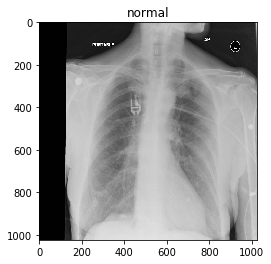

In [24]:
import cv2
import matplotlib.pyplot as plt
datadir = r'C:\Users\Acer\Dataset_1'
images = ['normal']

for file in images:
    path = os.path.join(datadir, file) #path to normal or tuberculosis dir/file
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.title('normal')
        plt.show()
        break
    break

In [25]:
print(img_array)

[[  1   1   1 ... 103 116  72]
 [  1   1   1 ... 234 235 142]
 [  1   1   1 ... 218 232 132]
 ...
 [  1   1   1 ... 211 218 115]
 [  1   1   1 ... 214 218 126]
 [  1   1   1 ...  92 116  61]]


In [26]:
#D:\crome download\Dataset\Normal\0_0.png
#D:\crome download\Dataset\Normal
#D:\crome download\Dataset\Normal\2152000

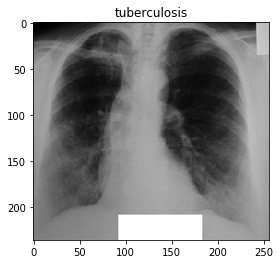

In [27]:
import cv2
import matplotlib.pyplot as plt
datadir = r'C:\Users\Acer\Dataset_1'
images = ['tuberculosis']

for file in images:
    path = os.path.join(datadir, file) #path to normal or tuberculosis dir/file
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.title('tuberculosis')
        plt.show()
        break
    break

In [28]:
print(img_array)

[[  8   8   9 ... 189 188 188]
 [  9   8   8 ... 189 188 187]
 [  9   8   8 ... 189 188 188]
 ...
 [131 131 130 ... 156 154 153]
 [128 129 128 ... 153 150 148]
 [137 138 137 ... 157 155 152]]


### the shape of each image and what are the max and min pixel values?

#### let's do it from all above source

In [29]:
def read_image_sizes(file_name):
    """
    1. Get the shape of the image
    2. Get the min and max pixel values in the image.
    Getting pixel values will tell if any pre-processing has been done.
    3. This info will be added to the original dataframe.
    """
    image = cv2.imread(IMAGE_PATH + file_name)
    max_pixel_val = image.max()
    min_pixel_val = image.min()
    
    # image.shape[2] represents the number of channels: (height, width, num_channels).
    # Here we are saying: If the shape does not have a value for num_channels (height, width)
    # then assign 1 to the number of channels.
    if len(image.shape) > 2: # i.e. more than two numbers in the tuple
        output = [image.shape[0], image.shape[1], image.shape[2], max_pixel_val, min_pixel_val]
    else:
        output = [image.shape[0], image.shape[1], 1, max_pixel_val, min_pixel_val]
    return output

#### np.stack -> Join a sequence of arrays along a new axis.

In [30]:
import numpy as np
IMAGE_PATH = r'C:/Users/Acer/Dataset_1/Normal/'

m = np.stack(df_normal['image_id'].apply(read_image_sizes))
df = pd.DataFrame(m,columns=['w','h','c','max_pixel_val','min_pixel_val'])
df_normal = pd.concat([df_normal,df],axis=1, sort=False)

df_normal.head()

,image_id,target,w,h,c,max_pixel_val,min_pixel_val
0,Normal0000.png,Normal,1024,1024,3,255,0
1,Normal1000.png,Normal,1024,1024,3,255,0
2,Normal10000.png,Normal,1024,1024,3,255,0
3,Normal100000.png,Normal,1024,1024,3,254,0
4,Normal1000000.png,Normal,1024,1024,3,255,0


In [31]:
IMAGE_PATH = r'C:/Users/Acer/Dataset_1/Tuberculosis/'

m = np.stack(df_tuberculosis['image_id'].apply(read_image_sizes))
df = pd.DataFrame(m,columns=['w','h','c','max_pixel_val','min_pixel_val'])
df_tuberculosis = pd.concat([df_tuberculosis,df],axis=1, sort=False)

df_tuberculosis.head()

,image_id,target,w,h,c,max_pixel_val,min_pixel_val
0,0011.png,Tuberculosis,236,256,3,255,5
1,1000011.png,Tuberculosis,256,211,3,212,0
2,100011.png,Tuberculosis,250,256,3,255,8
3,1001011.png,Tuberculosis,211,256,3,255,17
4,10011.png,Tuberculosis,1760,2140,3,255,0


#### In the above code w represent width h represents height and c represent channels.
#### channels represents the number of color specify for the color of each pixel.

In [32]:
df_normal['c'].value_counts()

3    3500
Name: c, dtype: int64

In [33]:
df_tuberculosis['c'].value_counts()

3    3500
Name: c, dtype: int64

#### their are three chnnels in the images. 

## Creating triain and validation set.

In [34]:
df_normal['target'].value_counts()

Normal    3500
Name: target, dtype: int64

In [35]:
#Combine the two dataframes and shuffle them
df_data = pd.concat([df_normal, df_tuberculosis], axis=0).reset_index(drop=True)
df_data = shuffle(df_data)
df_data.shape

(7000, 7)

In [36]:
df_data['labels'] = df_data['target'].map({'Normal' : 0, 'Tuberculosis' : 1})

In [37]:
df_data.head()

,image_id,target,w,h,c,max_pixel_val,min_pixel_val,labels
5187,2516011.png,Tuberculosis,256,211,3,195,0,1
1248,Normal2120000.png,Normal,1024,1024,3,255,0,0
5712,2990011.png,Tuberculosis,256,256,3,255,0,1
4716,2092011.png,Tuberculosis,211,256,3,243,0,1
2771,Normal3492000.png,Normal,1024,1024,3,255,0,0


In [38]:
#train_test_split

y = df_data['labels']

df_train, df_val = train_test_split(df_data, test_size=0.2, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)

(5600, 8)
(1400, 8)


In [39]:
df_train['target'].value_counts()

Normal          2800
Tuberculosis    2800
Name: target, dtype: int64

In [40]:
df_val['target'].value_counts()

Normal          700
Tuberculosis    700
Name: target, dtype: int64

### Creating various directories structure
#### once the directory is created then it will not excute again because the directory name is already available in model. if we run again then get an error of already directory name is available we need to delete the directory from the drive.

In [41]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train
    # Normal
    # Tuberculosis

# val
    # Normal
    # Tuberculosis


# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
Normal = os.path.join(train_dir, 'Normal')
os.mkdir(Normal)
Tuberculosis = os.path.join(train_dir, 'Tuberculosis')
os.mkdir(Tuberculosis)


# create new folders inside val_dir
Normal = os.path.join(val_dir, 'Normal')
os.mkdir(Normal)
Tuberculosis = os.path.join(val_dir, 'Tuberculosis')
os.mkdir(Tuberculosis)




In [42]:
# Set the image_id as the index in df_data
df_data.set_index(['image_id'], inplace=True)

In [43]:
# Total number of images we want to have in each class
NUM_AUG_IMAGES_WANTED = 1000 

# We will resize the images
IMAGE_HEIGHT = 96
IMAGE_WIDTH = 96

In [44]:
# Get a list of images in each of the two folders
folder_1 = os.listdir(r"C:\Users\Acer\Dataset_1\Normal")
folder_2 = os.listdir(r"C:\Users\Acer\Dataset_1\Tuberculosis")

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    fname = image
    label = df_data.loc[image,'target']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join(r"C:\Users\Acer\Dataset_1\Normal", fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # save the image at the destination
        cv2.imwrite(dst, image)
        #shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join(r"C:\Users\Acer\Dataset_1\Tuberculosis", fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # save the image at the destination
        cv2.imwrite(dst, image)
        
        # copy the image from the source to the destination
        #shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    fname = image
    label = df_data.loc[image,'target']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join(r"C:\Users\Acer\Dataset_1\Normal", fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # save the image at the destination
        cv2.imwrite(dst, image)
        
        # copy the image from the source to the destination
        #shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join(r"C:\Users\Acer\Dataset_1\Tuberculosis", fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # save the image at the destination
        cv2.imwrite(dst, image)
        
        # copy the image from the source to the destination
        #shutil.copyfile(src, dst)

In [45]:

print(len(os.listdir('base_dir/train_dir/Normal')))
print(len(os.listdir('base_dir/train_dir/Tuberculosis')))


2800
2800


In [46]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/Normal')))
print(len(os.listdir('base_dir/val_dir/Tuberculosis')))

700
700


## coping the train images into arugment directory named as "aug_dir"

### aug_dir is where we temporarily store images from a given class before feeding them into the generator for augmentation.¶

### We will not be augmenting on the fly. We will create augmented images, store them in folders together with the raw images and then feed these into the generators. I found that working this way makes the training process run faster.

In [47]:
class_list = ['Normal','Tuberculosis']

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later.
    # create a base dir
    aug_dir = 'aug_dir1'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'Normal'
    for fname in img_list:
            # source path to image
            src = os.path.join('base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='png',
                                                    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                                    batch_size=batch_size)
    
    
    # Generate the augmented images and add them to the training folders
    
    
    num_files = len(os.listdir(img_dir))
    
    # this creates a similar amount of images for each class
    num_batches = int(np.ceil((NUM_AUG_IMAGES_WANTED-num_files)/batch_size))

    # run the generator and create augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir1')

Found 2800 images belonging to 1 classes.
Found 2800 images belonging to 1 classes.


In [48]:
# Check how many train images we now have in each folder.
# This is the original images and the augmented images.

print(len(os.listdir('base_dir/train_dir/Normal')))
print(len(os.listdir('base_dir/train_dir/Tuberculosis')))

2800
2800


In [49]:
# Check how many val images we have in each folder.

print(len(os.listdir('base_dir/val_dir/Normal')))
print(len(os.listdir('base_dir/val_dir/Tuberculosis')))

700
700


## Visualize a batch of augmented images

In [50]:
# plots images with labels within jupyter notebook
# source: https://github.com/smileservices/keras_utils/blob/master/utils.py

def plots(ims, figsize=(20,10), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        


In [51]:
#plots(ims, titles=None) # titles=labels will display the image labels

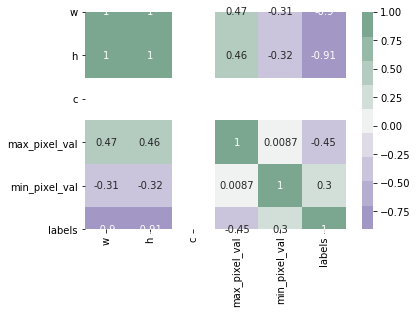

In [52]:
import seaborn as sns
cmap = sns.diverging_palette(275,150,s=40,l=65,n=9)
corrma = df_data.corr()
plt.subplot()
sns.heatmap(corrma, cmap=cmap, annot=True, square= True)

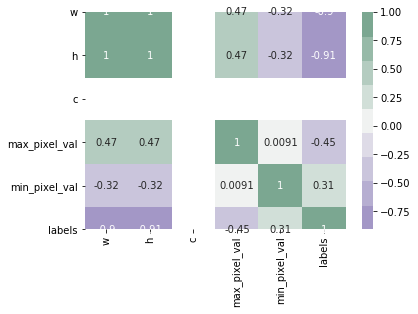

In [53]:
cmap = sns.diverging_palette(275,150,s=40,l=65,n=9)
corrma = df_train.corr()
plt.subplot()
sns.heatmap(corrma, cmap=cmap, annot=True, square= True)

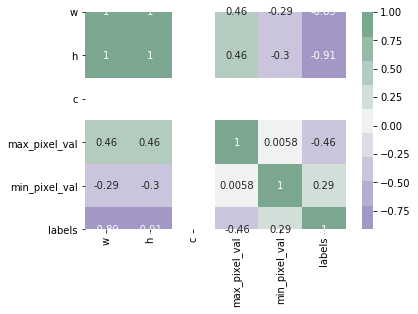

In [54]:
cmap = sns.diverging_palette(275,150,s=40,l=65,n=9)
corrma = df_val.corr()
plt.subplot()
sns.heatmap(corrma, cmap=cmap, annot=True, square= True)

Image name = Normal0000.png


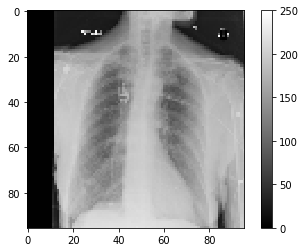

In [55]:
def load_image(path):
    for img in os.listdir(path):
        print('Image name =',img)
        image = cv2.imread(os.path.join(path, img))
        break
        
    return image

path = 'base_dir/train_dir/Normal/'
image = load_image(path)
plt.imshow(image,cmap='gray')
plt.colorbar()

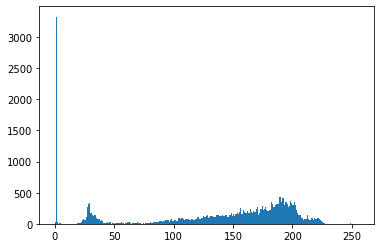

In [56]:
# plot a histogram
plt.hist(image.ravel(),256,[0,256]) 
plt.show()

Image name = Normal1000.png


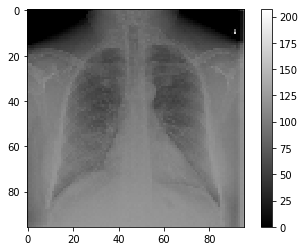

In [57]:

def load_image(path):
    for img in os.listdir(path):
        print('Image name =',img)
        image = cv2.imread(os.path.join(path, img))
        break
        
    return image

path = 'base_dir/val_dir/Normal/'
image = load_image(path)
plt.imshow(image,cmap='gray')
plt.colorbar()

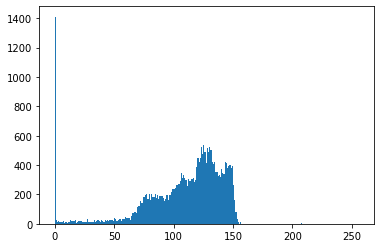

In [58]:
# plot a histogram
plt.hist(image.ravel(),256,[0,256]) 
plt.show()

Image name = 0011.png


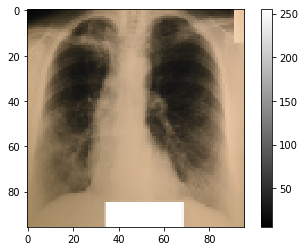

In [59]:

def load_image(path):
    for img in os.listdir(path):
        print('Image name =',img)
        image = cv2.imread(os.path.join(path, img))
        break
        
    return image

path = 'base_dir/train_dir/Tuberculosis/'
image = load_image(path)
plt.imshow(image,cmap='gray')
plt.colorbar()

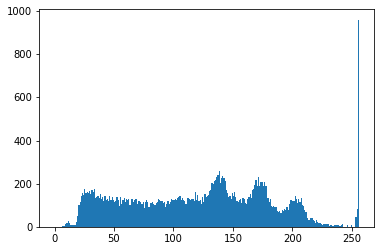

In [60]:
# plot a histogram
plt.hist(image.ravel(),256,[0,256]) 
plt.show()

Image name = 100011.png


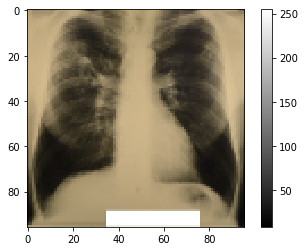

In [61]:
def load_image(path):
    for img in os.listdir(path):
        print('Image name =',img)
        image = cv2.imread(os.path.join(path, img))
        break
        
    return image

path = 'base_dir/val_dir/Tuberculosis/'
image = load_image(path)
plt.imshow(image,cmap='gray')
plt.colorbar()

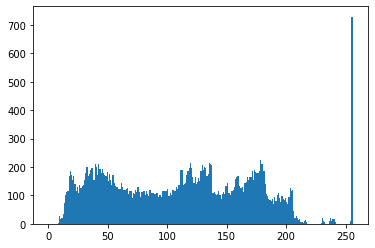

In [62]:
# plot a histogram
plt.hist(image.ravel(),256,[0,256]) 
plt.show()

In [63]:
# end of data preparation
###=========================================================
# start of Model Buliding

## Set Up the Generators

In [64]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [65]:

datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

#shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                        batch_size=val_batch_size,
                                        class_mode='categorical',
                                        shuffle=False)

Found 5600 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.


In [66]:

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 41, 41, 64)        3

## train the model


In [67]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [68]:
filepath = r"model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                            validation_data=val_gen,
                            validation_steps=val_steps,
                            epochs=100, verbose=1,
                           callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 560.0 steps, validate for 140.0 steps
Epoch 1/100
558/560 [============================>.] - ETA: 0s - loss: 0.4362 - accuracy: 0.7975
Epoch 00001: val_accuracy improved from -inf to 0.80143, saving model to model.h5
560/560 [==============================] - 30s 54ms/step - loss: 0.4355 - accuracy: 0.7979 - val_loss: 0.4712 - val_accuracy: 0.8014
Epoch 2/100
558/560 [============================>.] - ETA: 0s - loss: 0.3273 - accuracy: 0.8645
Epoch 00002: val_accuracy improved from 0.80143 to 0.83071, saving model to model.h5
560/560 [==============================] - 15s 27ms/step - loss: 0.3283 - accuracy: 0.8645 - val_loss: 0.3818 - val_accuracy: 0.8307
Epoch 3/100
559/560 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.8773
Epoch 00003: val_accuracy improved from 0.83071 to 0.88571, saving model to model.h5
560/560 [========

Epoch 26/100
559/560 [============================>.] - ETA: 0s - loss: 0.0510 - accuracy: 0.9818
Epoch 00026: val_accuracy did not improve from 0.96357
560/560 [==============================] - 16s 28ms/step - loss: 0.0512 - accuracy: 0.9816 - val_loss: 0.1509 - val_accuracy: 0.9414
Epoch 27/100
559/560 [============================>.] - ETA: 0s - loss: 0.0497 - accuracy: 0.9825
Epoch 00027: val_accuracy did not improve from 0.96357
560/560 [==============================] - 15s 28ms/step - loss: 0.0496 - accuracy: 0.9825 - val_loss: 0.1485 - val_accuracy: 0.9371
Epoch 28/100
559/560 [============================>.] - ETA: 0s - loss: 0.0509 - accuracy: 0.9823
Epoch 00028: val_accuracy did not improve from 0.96357
560/560 [==============================] - 15s 28ms/step - loss: 0.0508 - accuracy: 0.9823 - val_loss: 0.0952 - val_accuracy: 0.9571
Epoch 29/100
558/560 [============================>.] - ETA: 0s - loss: 0.0494 - accuracy: 0.9814
Epoch 00029: val_accuracy did not improve fr

559/560 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9889
Epoch 00054: val_accuracy did not improve from 0.96714
560/560 [==============================] - 15s 27ms/step - loss: 0.0316 - accuracy: 0.9889 - val_loss: 0.1340 - val_accuracy: 0.9479
Epoch 55/100
559/560 [============================>.] - ETA: 0s - loss: 0.0348 - accuracy: 0.9859
Epoch 00055: val_accuracy did not improve from 0.96714
560/560 [==============================] - 15s 27ms/step - loss: 0.0348 - accuracy: 0.9859 - val_loss: 0.1549 - val_accuracy: 0.9414
Epoch 56/100
559/560 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9887
Epoch 00056: val_accuracy did not improve from 0.96714
560/560 [==============================] - 16s 28ms/step - loss: 0.0314 - accuracy: 0.9887 - val_loss: 0.1441 - val_accuracy: 0.9457
Epoch 57/100
559/560 [============================>.] - ETA: 0s - loss: 0.0310 - accuracy: 0.9889
Epoch 00057: val_accuracy did not improve from 0.96714
56

Epoch 83/100
557/560 [============================>.] - ETA: 0s - loss: 0.0229 - accuracy: 0.9908
Epoch 00083: val_accuracy did not improve from 0.97500
560/560 [==============================] - 16s 28ms/step - loss: 0.0228 - accuracy: 0.9909 - val_loss: 0.1144 - val_accuracy: 0.9579
Epoch 84/100
559/560 [============================>.] - ETA: 0s - loss: 0.0235 - accuracy: 0.9916
Epoch 00084: val_accuracy did not improve from 0.97500
560/560 [==============================] - 16s 28ms/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.0751 - val_accuracy: 0.9700
Epoch 85/100
558/560 [============================>.] - ETA: 0s - loss: 0.0251 - accuracy: 0.9905
Epoch 00085: val_accuracy did not improve from 0.97500
560/560 [==============================] - 15s 27ms/step - loss: 0.0252 - accuracy: 0.9904 - val_loss: 0.1103 - val_accuracy: 0.9564
Epoch 86/100
558/560 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9918
Epoch 00086: val_accuracy did not improve fr

### Evaluate the model using the val set

In [134]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [135]:
from numpy.random import seed
seed(101)
import tensorflow as tf
tf.random.set_seed(101)
print(os.getcwd())

C:\Users\Acer\Dataset_1


In [136]:
val_accuracy = np.mean(history.history['val_accuracy'])
print('\n%s: %.2f%%'% ('val_accuracy',val_accuracy*100))
val_loss = np.mean(history.history['val_loss'])
print('\n%s: %.2f%%'% ('val_loss',val_loss*100))



val_accuracy: 94.20%

val_loss: 14.94%


In [137]:
model.load_weights('model.h5')

val_loss, val_acc = model.evaluate_generator(test_gen, 
                        steps=val_steps)

print('val_loss:', val_loss)
print('val_accuracy:', val_acc)

  ...
    to  
  ['...']
val_loss: 0.06572914512813059
val_accuracy: 0.975


In [138]:
model.load_weights('model.h5')

loss, accuracy = model.evaluate_generator(test_gen, 
                        steps=val_steps)

print('loss:', loss)
print('accuracy:', accuracy)

  ...
    to  
  ['...']
loss: 0.06572914512813059
accuracy: 0.975


<Figure size 432x288 with 0 Axes>

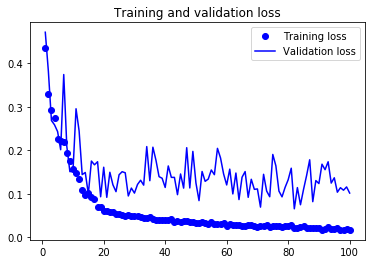

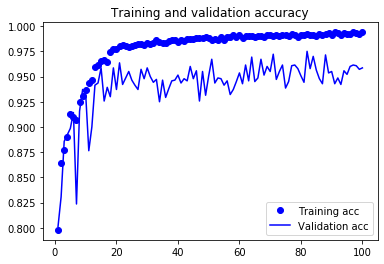

<Figure size 432x288 with 0 Axes>

In [139]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [140]:
# Get the labels of the test images.
test_labels = test_gen.classes

In [141]:
# We need these to plot the confusion matrix.
test_labels

array([0, 0, 0, ..., 1, 1, 1])

In [142]:
# Print the label associated with each class
test_gen.class_indices

{'Normal': 0, 'Tuberculosis': 1}

## Testing the model

In [143]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=val_steps, verbose=1)

140/140 [==============================] - 1s 8ms/step


In [144]:
predictions.shape

(1400, 2)

## Create a Confusion Matrix

In [145]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [146]:

test_labels.shape

(1400,)

In [147]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [148]:
test_gen.class_indices

{'Normal': 0, 'Tuberculosis': 1}

Confusion matrix, without normalization
[[676  24]
 [ 11 689]]


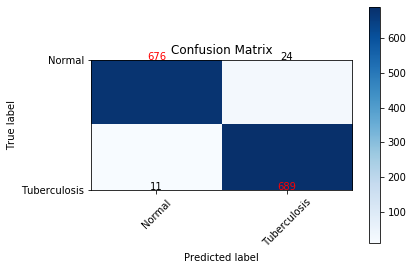

In [149]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['Normal', 'Tuberculosis']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

### Creating a Classification Report

In [85]:
# Get the filenames, labels and associated predictions

# This outputs the sequence in which the generator processed the test images
test_filenames = test_gen.filenames

# Get the true labels
y_true = test_gen.classes

# Get the predicted labels
y_pred = predictions.argmax(axis=1)

In [86]:
from sklearn.metrics import classification_report

# Generating a classification report

report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)


              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       700
Tuberculosis       0.97      0.98      0.98       700

    accuracy                           0.97      1400
   macro avg       0.98      0.98      0.97      1400
weighted avg       0.98      0.97      0.97      1400



## Deleting the base dictonary

In [87]:
shutil.rmtree('base_dir')